In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [71]:
train_data = pd.read_csv('../input/spaceship-titanic/train.csv')
test_data = pd.read_csv('../input/spaceship-titanic/test.csv')

In [72]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [74]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [75]:
#Excluding what I consider true outliers
train_data = train_data[(train_data['RoomService'] < 14000) | (pd.isna(train_data['RoomService']))]
train_data = train_data[(train_data['ShoppingMall'] < 20000)| (pd.isna(train_data['ShoppingMall']))]
train_data = train_data[(train_data['Spa'] < 20000)| (pd.isna(train_data['Spa']))]
train_data = train_data[(train_data['VRDeck'] < 20000)| (pd.isna(train_data['VRDeck']))]
#data
train_data.shape

(8688, 14)

<AxesSubplot:>

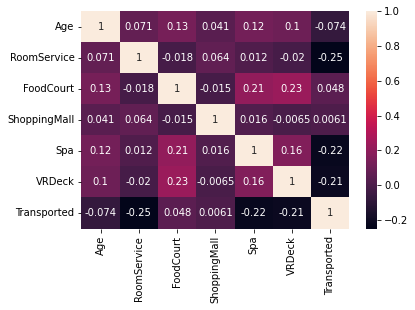

In [76]:
import seaborn as sns
sns.heatmap(train_data.corr(), annot=True)

In [77]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')
train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})                
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8509.000000,8507.000000,8505.000000,8480.000000,8506.000000,8500.000000,8688.000000
mean,28.821366,223.097332,455.763433,171.035731,308.535269,299.800118,0.503798
std,14.483233,649.135976,1604.345238,549.297028,1111.425817,1095.155945,0.500014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,46.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,9920.000000,29813.000000,12253.000000,18572.000000,17306.000000,1.000000


In [78]:
# df with all data except name (ASSUMIING name has no impact on the output)
df =  train_data.drop(['Name'] , axis=1)
# creating new columns from PassengerId and Cabin columns
# new column group
df['Group'] = df.index.str[:4]
df['Group'] = df.Group.astype(int)
# new column number in group
df['Number'] = df.index.str[-2:]
df['Number'] = df.Number.astype(int)
# new column Deck
df['Deck'] = df.Cabin.str[0]
# new column NumCabin
df['NumCabin'] = df.Cabin.str[2:-2]
# new column Side
df['Side'] = df.Cabin.str[-1]
df = df.drop('Cabin', axis = 1)

# SAME CHANGES FOR TEST
# df with all data except name (ASSUMIING name has no impact on the output)
test_data =  test_data.drop(['Name'] , axis=1)
# creating new columns from PassengerId and Cabin columns
# new column group
test_data['Group'] = test_data.index.str[:4]
test_data['Group'] = test_data.Group.astype(int)
# new column number in group
test_data['Number'] = test_data.index.str[-2:]
test_data['Number'] = test_data.Number.astype(int)
# new column Deck
test_data['Deck'] = test_data.Cabin.str[0]
# new column NumCabin
test_data['NumCabin'] = test_data.Cabin.str[2:-2]
# new column Side
test_data['Side'] = test_data.Cabin.str[-1]
test_data = test_data.drop('Cabin', axis = 1)


In [79]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             182
VRDeck          188
Transported       0
Group             0
Number            0
Deck            198
NumCabin        198
Side            198
dtype: int64

In [80]:
def fillnull(df):
    notest = 'Transported' in df.columns
    for i in range(len(df.columns)):
        if(df.dtypes[i] == float):
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group','Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group'])[df.columns[i]].transform('mean'))
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
        else:
            #I need to figure out how to replace null values with the mode of their groups in cathegorical columns as i do with
            #the mean in numeric columns
            if notest:
                df.dropna(inplace = True)
            else:
                df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])
    print(df.isnull().sum())

fillnull(df)
fillnull(test_data)

df['CryoSleep'] = df['CryoSleep'] ==True
df['VIP'] = df['VIP'] ==True

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Number          0
Deck            0
NumCabin        0
Side            0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Number          0
Deck            0
NumCabin        0
Side            0
dtype: int64


In [81]:
df['NumCabin'] = df.NumCabin.astype(int)
test_data['NumCabin'] = test_data.NumCabin.astype(int)

In [82]:
target = df['Transported']
df =  df.drop(['Transported'] , axis=1)

In [83]:
features_num = []
features_cat = []

for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        features_cat.append(df.columns[i])
    else:
        features_num.append(df.columns[i])
        
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [84]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(df, target, stratify=target, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [85]:
from tensorflow import keras
from tensorflow.keras import layers
models = []
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation= keras.layers.LeakyReLU(alpha=0.1)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation= keras.layers.LeakyReLU(alpha=0.1)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation=keras.layers.PReLU()),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)

model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(128, activation='selu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation=keras.layers.PReLU()),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     layers.Dense(128, activation= keras.layers.LeakyReLU(alpha=0.1)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
models.append(model)



In [86]:
for model in models:
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['binary_accuracy'],
    )
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

histories = []
for model in models:
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=256,
        epochs=200,

        callbacks=[early_stopping],
    )
    histories.append(history)


Epoch 1/200
20/20 [==============================] - 3s 26ms/step - loss: 0.6145 - binary_accuracy: 0.7178 - val_loss: 0.5631 - val_binary_accuracy: 0.7363
Epoch 2/200
20/20 [==============================] - 0s 14ms/step - loss: 0.4823 - binary_accuracy: 0.7777 - val_loss: 0.5516 - val_binary_accuracy: 0.6913
Epoch 3/200
20/20 [==============================] - 0s 13ms/step - loss: 0.4574 - binary_accuracy: 0.7775 - val_loss: 0.5420 - val_binary_accuracy: 0.6753
Epoch 4/200
20/20 [==============================] - 0s 12ms/step - loss: 0.4447 - binary_accuracy: 0.7915 - val_loss: 0.5389 - val_binary_accuracy: 0.6688
Epoch 5/200
20/20 [==============================] - 0s 12ms/step - loss: 0.4296 - binary_accuracy: 0.7949 - val_loss: 0.5220 - val_binary_accuracy: 0.6818
Epoch 6/200
20/20 [==============================] - 0s 12ms/step - loss: 0.4213 - binary_accuracy: 0.7949 - val_loss: 0.5093 - val_binary_accuracy: 0.7025
Epoch 7/200
20/20 [==============================] - 0s 12ms/ste

In [87]:
test_trans = preprocessor.fit_transform(test_data)
predictions = pd.DataFrame()
for i in range(len(models)):
    y_pred = models[i].predict(test_trans)
    pred = []
    for element in y_pred:
        pred.append(element[0])
    predictions[i] = pred
predictions[1200:1225]


,0,1,2,3,4,5
1200,0.290894,0.216618,0.199270,0.227351,0.182353,0.188197
1201,0.992188,0.987797,0.991123,0.992398,0.990803,0.983388
1202,0.992614,0.991407,0.992136,0.995025,0.996663,0.997755
1203,0.967100,0.963822,0.958111,0.975473,0.968943,0.978483
1204,0.773736,0.674312,0.680142,0.688257,0.709936,0.661737
1205,0.400955,0.485123,0.479427,0.392887,0.437451,0.379233
1206,0.366297,0.339609,0.363569,0.313537,0.254885,0.231306
1207,0.985650,0.985958,0.995904,0.993663,0.994260,0.982537
1208,0.614293,0.648242,0.580064,0.543177,0.488559,0.489829
1209,0.136347,0.143696,0.127214,0.123744,0.101352,0.126525


In [88]:
predictions['final_prediction'] = predictions.mean(axis=1)
predictions

,0,1,2,3,4,5,final_prediction
0,0.426947,0.429377,0.465584,0.431804,0.417445,0.440873,0.435338
1,0.012523,0.024383,0.032583,0.029346,0.031381,0.024825,0.025840
2,0.999023,0.998907,0.996854,0.998882,0.998851,0.998135,0.998442
3,0.999038,0.997073,0.997202,0.999196,0.993644,0.994227,0.996730
4,0.470849,0.428305,0.517409,0.476567,0.533400,0.368122,0.465775
...,...,...,...,...,...,...,...
4272,0.527622,0.728096,0.561856,0.483972,0.421227,0.470249,0.532171
4273,0.860412,0.622148,0.886446,0.658958,0.775482,0.926116,0.788261
4274,0.980222,0.966506,0.971829,0.962344,0.981177,0.967901,0.971663
4275,0.877686,0.812229,0.832534,0.711126,0.815272,0.767040,0.802648


In [89]:
f = open ('/kaggle/working/submission.csv','w')
f.write('PassengerId,Transported\n')
for i in range(len(y_pred)):
    f.write(test_data.index[i])
    f.write(',')
    f.write(str(predictions['final_prediction'][i] > 0.5))
    f.write('\n')
f.close()